In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

data = df.sample(n=10000, random_state=42)

# Display initial data to understand what needs to be processed
data.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
100905,7315883828,lakeland,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,gas,38094.0,clean,other,1FTFX1EG9HKD14814,4wd,NaN,pickup,white,fl
143835,7314599643,"quad cities, IA/IL",27995,2006.0,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,manual,NaN,rwd,NaN,convertible,black,il
20235,7308399808,little rock,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,gas,30200.0,clean,automatic,NaN,rwd,NaN,convertible,NaN,ar
300734,7312663807,northern panhandle,14000,2013.0,bmw,328i,NaN,NaN,gas,92965.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,oh
316249,7315368523,eugene,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,other,47105.0,clean,automatic,1GNSKGKC7KR124145,NaN,NaN,NaN,black,or
163902,7309863303,waterloo / cedar falls,2744,2002.0,chrysler,town country,excellent,6 cylinders,gas,229031.0,clean,automatic,2C4GP44392R547816,fwd,NaN,mini-van,blue,ia
353675,7315163492,jackson,15293,2015.0,mitsubishi,outlander sport,excellent,4 cylinders,gas,36646.0,clean,automatic,NaN,fwd,NaN,SUV,white,tn
265426,7304728134,albany,4500,2008.0,hyundai,elantra,good,4 cylinders,gas,111000.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,ny
231608,7316972938,charlotte,22991,2016.0,ford,mustang,NaN,4 cylinders,gas,79631.0,clean,automatic,1FA6P8TH9G5224182,rwd,NaN,other,custom,nc
297925,7303836633,columbus,41995,2015.0,chevrolet,silverado 2500hd,NaN,NaN,gas,158039.0,clean,automatic,1GC1KWE87FF570325,NaN,NaN,other,white,oh


In [2]:
# General information about the dataset
data_info = data.info()

# Summary statistics for numerical features
data_description = data.describe()

# Summarize missing values
missing_values = data.isnull().sum()

# Display unique values for categorical variables
categorical_vars = data.select_dtypes(include=['object'])
unique_counts = categorical_vars.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 100905 to 251540
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   region        10000 non-null  object 
 2   price         10000 non-null  int64  
 3   year          9974 non-null   float64
 4   manufacturer  9611 non-null   object 
 5   model         9888 non-null   object 
 6   condition     5958 non-null   object 
 7   cylinders     5824 non-null   object 
 8   fuel          9916 non-null   object 
 9   odometer      9896 non-null   float64
 10  title_status  9788 non-null   object 
 11  transmission  9942 non-null   object 
 12  VIN           6205 non-null   object 
 13  drive         6990 non-null   object 
 14  size          2805 non-null   object 
 15  type          7884 non-null   object 
 16  paint_color   7010 non-null   object 
 17  state         10000 non-null  object 
dtypes: float64(2), int64(2), 

In [3]:
columns_to_check = ['region','state','price','type','year', 'paint_color','odometer','manufacturer','model','condition','fuel','size','drive']
print("Number of rows before dropping duplicates:", data.shape[0])
clean_data = data.drop_duplicates(subset=columns_to_check)
print("Number of rows after dropping duplicates:", clean_data.shape[0])
print("Missing values in each column:", clean_data.isnull().sum())

Number of rows before dropping duplicates: 10000
Number of rows after dropping duplicates: 9939
Missing values in each column: id                 0
region             0
price              0
year              26
manufacturer     388
model            112
condition       4006
cylinders       4145
fuel              84
odometer         103
title_status     211
transmission      58
VIN             3766
drive           2988
size            7153
type            2097
paint_color     2968
state              0
dtype: int64


In [4]:
# Define the columns to check for missing values
rows_to_check = ['year', 'manufacturer', 'model']

# Identify rows where all specified columns have NaN values
# .isnull() checks for NaN values, and .all(axis=1) ensures that all specified columns are NaN in each row
rowsToDelete = clean_data[rows_to_check].isnull().all(axis=1)

# Print the number of rows to delete
# .sum() counts the number of True values in the boolean Series rowsToDelete
print("Rows to delete:")
print(rowsToDelete.sum())

# Remove rows where all specified columns are NaN
# ~rowsToDelete inverts the boolean Series, selecting rows that do not meet the deletion condition
clean_data = clean_data[~rowsToDelete]

# Reset the index
clean_data.reset_index(drop=True, inplace=True)

Rows to delete:
0


In [5]:
# Identify rows where both manufacturer and model are null
clean_data[clean_data['manufacturer'].isnull() & clean_data['model'].isnull()].shape

(0, 18)

In [6]:
# Display size and columns in cars_cleaned dataset
clean_data.shape, clean_data.columns

((9939, 18),
 Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
        'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
        'drive', 'size', 'type', 'paint_color', 'state'],
       dtype='object'))

In [7]:
# Calculate the mean of the 'year' column, ignoring NaNs
mean_year = round(clean_data['year'].mean())
print(mean_year)

# Fill missing values in the 'year' column with the mean value
clean_data['year'] = clean_data['year'].fillna(mean_year)

# Fill missing values in the 'model' & ' column with Unknown value
clean_data['model'] = clean_data['model'].fillna('Unknown')
clean_data['manufacturer'] = clean_data['manufacturer'].fillna('Unknown')

# fill missing values in 'condition' with the mode
mode_value = clean_data['condition'].mode()[0]
clean_data['condition'] = clean_data['condition'].fillna(mode_value)

print("Missing values in each column:", clean_data.isnull().sum())

2011
Missing values in each column: id                 0
region             0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders       4145
fuel              84
odometer         103
title_status     211
transmission      58
VIN             3766
drive           2988
size            7153
type            2097
paint_color     2968
state              0
dtype: int64


In [8]:
# Identify columns with missing values
columns_with_missing = clean_data.columns[clean_data.isnull().any()]

# Calculate percentage of missing values for each column
missing_percentage = (clean_data[columns_with_missing].isnull().mean() * 100)
print("Percentage of missing values in each column:")

for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Percentage of missing values in each column:
cylinders: 41.70%
fuel: 0.85%
odometer: 1.04%
title_status: 2.12%
transmission: 0.58%
VIN: 37.89%
drive: 30.06%
size: 71.97%
type: 21.10%
paint_color: 29.86%


In [9]:
clean_data.drop(columns=['size'], inplace=True)
clean_data.drop(columns=['cylinders'], inplace=True)
clean_data.drop(columns=['VIN'], inplace=True)
clean_data.drop(columns=['drive'], inplace=True)
clean_data.drop(columns=['paint_color'], inplace=True)
print("Missing values in each column:", clean_data.isnull().sum())

Missing values in each column: id                 0
region             0
price              0
year               0
manufacturer       0
model              0
condition          0
fuel              84
odometer         103
title_status     211
transmission      58
type            2097
state              0
dtype: int64


<Axes: >

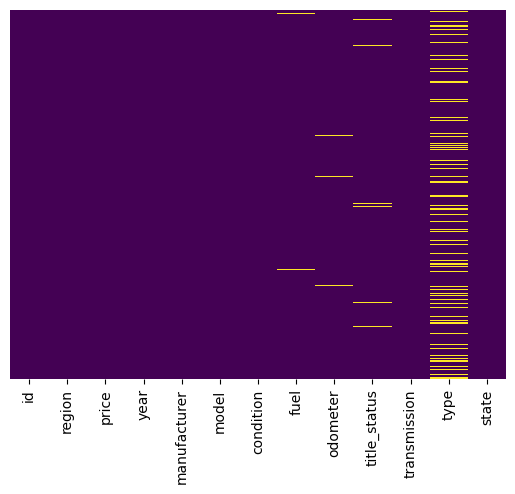

In [10]:
sns.heatmap(clean_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
#df = pd.read_csv('data/vehicles.csv')
df = clean_data

# Display the original DataFrame with missing values
print("Original DataFrame with missing values:")
print(df.head())

# Identify object columns and convert them to categorical type
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype('category')

print("\nDataFrame with object columns converted to categorical type:")
print(df.head())

# Store the original categories
original_categories = {}
for col in object_cols:
    original_categories[col] = df[col].cat.categories

# Encode categorical columns
for col in object_cols:
    df[col] = df[col].cat.codes.replace(-1, np.nan)  # Replace -1 (pandas code for NaN) with np.nan

print("\nDataFrame with encoded categorical columns:")
print(df.head())

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_imputed = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nDataFrame after imputation:")
print(df_imputed.head())

# Convert encoded columns back to their original categories using a safer mapping strategy
for col in object_cols:
    valid_codes = range(len(original_categories[col]))
    df_imputed[col] = df_imputed[col].round().astype(int).map(lambda x: original_categories[col][x] if x in valid_codes else np.nan)

print("\nDataFrame with encoded columns converted back to original categories:")
print(df_imputed.head())


Original DataFrame with missing values:
           id              region  price    year manufacturer  \
0  7315883828            lakeland  36990  2017.0         ford   
1  7314599643  quad cities, IA/IL  27995  2006.0    chevrolet   
2  7308399808         little rock  78423  2015.0    chevrolet   
3  7312663807  northern panhandle  14000  2013.0          bmw   
4  7315368523              eugene    676  2019.0    chevrolet   

                   model condition   fuel  odometer title_status transmission  \
0  f150 super cab lariat      good    gas   38094.0        clean        other   
1               corvette      good    gas       NaN        clean       manual   
2               corvette      good    gas   30200.0        clean    automatic   
3                   328i      good    gas   92965.0        clean    automatic   
4            suburban ls      good  other   47105.0        clean    automatic   

          type state  
0       pickup    fl  
1  convertible    il  
2  convertibl

<Axes: >

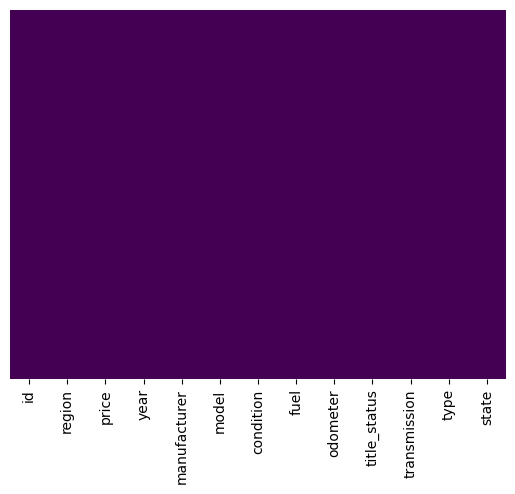

In [12]:
sns.heatmap(df_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df_imputed.head(200)

,id,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,type,state
0,7.315884e+09,lakeland,36990.0,2017.0,ford,f150 super cab lariat,good,gas,38094.000000,clean,other,pickup,fl
1,7.314600e+09,"quad cities, IA/IL",27995.0,2006.0,chevrolet,corvette,good,gas,96799.126714,clean,manual,convertible,il
2,7.308400e+09,little rock,78423.0,2015.0,chevrolet,corvette,good,gas,30200.000000,clean,automatic,convertible,ar
3,7.312664e+09,northern panhandle,14000.0,2013.0,bmw,328i,good,gas,92965.000000,clean,automatic,other,oh
4,7.315369e+09,eugene,676.0,2019.0,chevrolet,suburban ls,good,other,47105.000000,clean,automatic,mini-van,or
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.316816e+09,portland,0.0,2016.0,kia,forte lx,good,gas,86668.000000,clean,automatic,sedan,or
196,7.315171e+09,wichita,14995.0,2019.0,kia,forte fe,excellent,gas,30633.000000,clean,automatic,sedan,ks
197,7.313742e+09,jacksonville,6995.0,2005.0,nissan,titan,good,gas,188208.000000,clean,automatic,truck,fl
198,7.304355e+09,treasure coast,3150.0,2010.0,ford,crown victoria police,good,gas,137677.000000,clean,automatic,sedan,fl


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best Model - MAE: 7616.336830192502, MSE: 637969966.5588939, R2: 0.14859493865945783


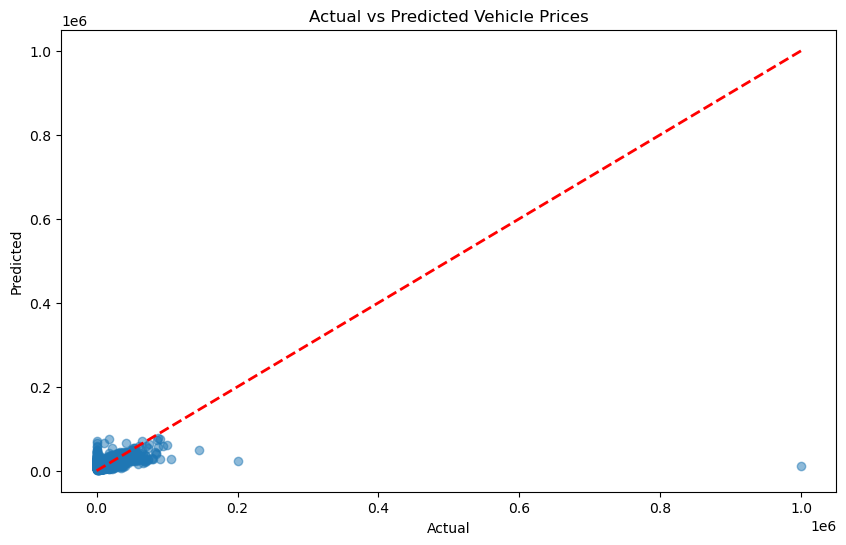

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

# Reduce cardinality by grouping rare categories into 'Other'
def reduce_cardinality(df, col, threshold=0.01):
    value_counts = df[col].value_counts(normalize=True)
    to_combine = value_counts[value_counts < threshold].index
    df[col] = df[col].replace(to_combine, 'Other')
    return df

# Apply cardinality reduction to object columns
for col in object_cols:
    df_imputed = reduce_cardinality(df_imputed, col)

# One-hot encoding for categorical columns
df_imputed = pd.get_dummies(df_imputed, columns=object_cols, drop_first=True)

# Split the data into training and testing sets
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a smaller parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the random search with fewer iterations
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Reduced number of parameter settings that are sampled
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters: {random_search.best_params_}')

# Use the best model for prediction and evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Model - MAE: {mae}, MSE: {mse}, R2: {r2}')

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_model.pkl')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Vehicle Prices')
plt.show()


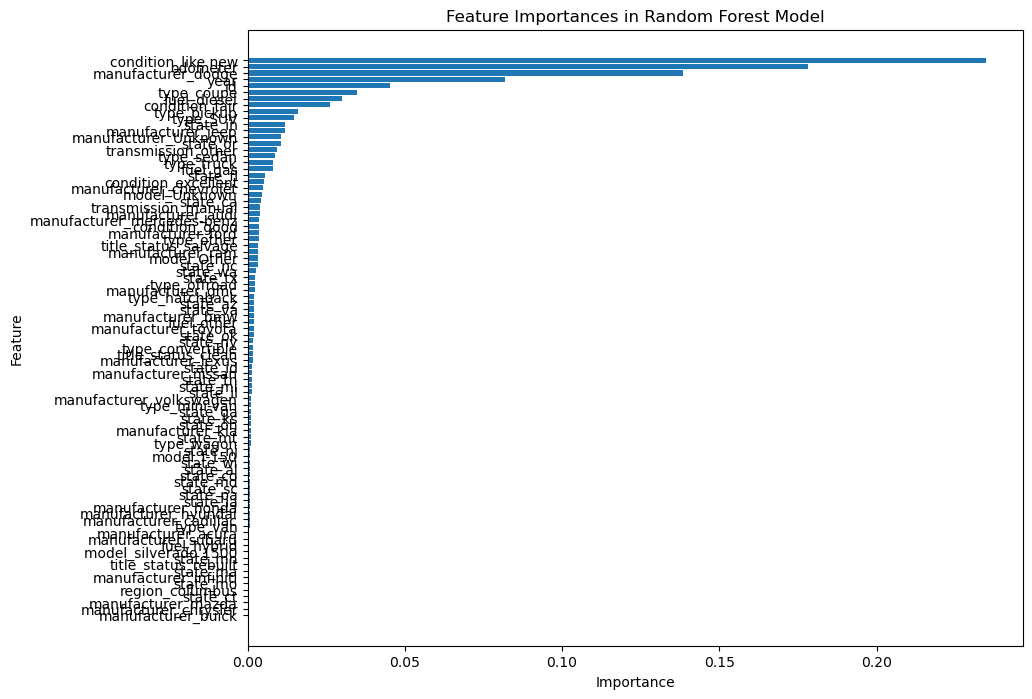

In [16]:
# Get feature importances
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Display the feature importances in a table format
print(feature_importances.head(20))  # Display top 20 important features

                 feature  importance
35    condition_like new    0.234726
2               odometer    0.178339
12    manufacturer_dodge    0.138322
1                   year    0.081799
0                     id    0.045397
47            type_coupe    0.034838
36           fuel_diesel    0.029987
33        condition_fair    0.026320
52           type_pickup    0.015870
45              type_SUV    0.014641
67              state_in    0.011997
18     manufacturer_jeep    0.011965
4   manufacturer_Unknown    0.010553
80              state_or    0.010502
44    transmission_other    0.009242
53            type_sedan    0.008701
54            type_truck    0.008073
37              fuel_gas    0.007955
62              state_fl    0.005544
32   condition_excellent    0.005257


ModuleNotFoundError: No module named 'ace_tools'

In [18]:
!pip install ace_tools

In [20]:
import ace_tools as tools
tools.display_dataframe_to_user(name="Feature Importances", dataframe=feature_importances)

ModuleNotFoundError: No module named 'ace_tools'